In [1]:
#Common necessery libraries
#### Data Processing
import pandas as pd
import numpy as np

#### Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\syntetic_fraud_sample.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,19,CASH_OUT,72872.51,C2043380801,189.00,0.00,C1384249206,676319.22,493973.74,0,0
1,207,PAYMENT,3200.11,C426535344,0.00,0.00,M724865366,0.00,0.00,0,0
2,262,CASH_OUT,73968.59,C1280271806,202404.00,128435.41,C652886948,5660.77,79629.36,0,0
3,251,CASH_IN,1071.73,C1331515829,32106.00,33177.73,C88206578,261916.77,260845.04,0,0
4,327,CASH_IN,11680.07,C150656696,6957081.08,6968761.15,C807268977,18094.63,6414.56,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49794 entries, 0 to 49793
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            49794 non-null  int64  
 1   type            49794 non-null  object 
 2   amount          49794 non-null  float64
 3   nameOrig        49794 non-null  object 
 4   oldbalanceOrg   49794 non-null  float64
 5   newbalanceOrig  49794 non-null  float64
 6   nameDest        49794 non-null  object 
 7   oldbalanceDest  49794 non-null  float64
 8   newbalanceDest  49794 non-null  float64
 9   isFlaggedFraud  49794 non-null  int64  
 10  isFraud         49794 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


In [4]:
## Checking for missing value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

In [5]:
df.describe(include='O').T

,count,unique,top,freq
type,49794,5,CASH_OUT,17559
nameOrig,49794,49794,C1742722485,1
nameDest,49794,47895,C565687173,5


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,49794.0,2.435797e+02,1.422950e+02,1.00,156.000,239.000,3.340000e+02,7.180000e+02
amount,49794.0,1.807781e+05,6.450799e+05,0.97,13434.745,75099.815,2.093683e+05,5.072328e+07
oldbalanceOrg,49794.0,8.313532e+05,2.886108e+06,0.00,0.000,14508.000,1.096302e+05,3.320529e+07
newbalanceOrig,49794.0,8.527516e+05,2.923398e+06,0.00,0.000,0.000,1.449847e+05,3.351418e+07
oldbalanceDest,49794.0,1.108506e+06,3.207731e+06,0.00,0.000,132270.905,9.602651e+05,2.355353e+08
newbalanceDest,49794.0,1.232869e+06,3.500876e+06,0.00,0.000,218340.225,1.123575e+06,2.358797e+08
isFlaggedFraud,49794.0,0.000000e+00,0.000000e+00,0.00,0.000,0.000,0.000000e+00,0.000000e+00
isFraud,49794.0,1.285295e-03,3.582833e-02,0.00,0.000,0.000,0.000000e+00,1.000000e+00


### Data Preparation

In [7]:
## Checking for balance/ imbalance data of target
(((df['isFraud'].value_counts())/len(df))*100).round(2)

0    99.87
1     0.13
Name: isFraud, dtype: float64

In [8]:
df['isFraud'].value_counts()

0    49730
1       64
Name: isFraud, dtype: int64

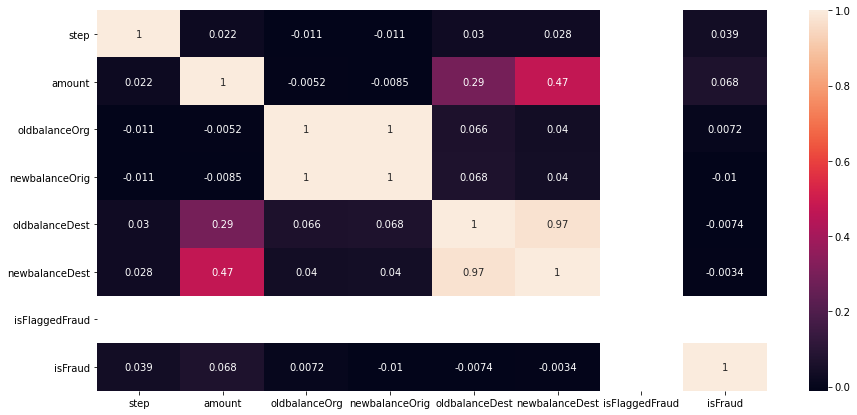

In [9]:
## Checking for correlation among features
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
##Correlation within Target
df.corr()['isFraud'].sort_values(ascending=False)[1:]

amount            0.068405
step              0.039416
oldbalanceOrg     0.007203
newbalanceDest   -0.003444
oldbalanceDest   -0.007415
newbalanceOrig   -0.010465
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [11]:
## Encoding 
df = pd.get_dummies(data=df, columns=['type'], prefix_sep='_')

In [12]:
## Feature Selection 
df.drop(columns=['isFlaggedFraud', 'nameOrig', 'nameDest', 'oldbalanceOrg', 'oldbalanceDest'], inplace=True)

In [13]:
df.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,19,72872.51,0.00,493973.74,0,0,1,0,0,0
1,207,3200.11,0.00,0.00,0,0,0,0,1,0
2,262,73968.59,128435.41,79629.36,0,0,1,0,0,0
3,251,1071.73,33177.73,260845.04,0,1,0,0,0,0
4,327,11680.07,6968761.15,6414.56,0,1,0,0,0,0


### Machine Learning Building

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
from sklearn import set_config
set_config(print_changed_only=False)

In [16]:
## Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [17]:
x=df.drop(columns='isFraud')
y=df['isFraud']

In [18]:
## Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=.80, random_state=42)

### Handling Imbalance data

In [19]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,step,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
17485,157,179054.55,1646784.75,266610.01,1,0,0,0,0,0
265,256,9836.76,21476.24,0.00,0,0,0,1,0,0
12538,182,2129.41,1949.59,0.00,0,0,0,1,0,0
14162,8,206499.82,226773.82,0.00,1,0,0,0,0,0
9296,330,223620.78,0.00,224973.47,0,1,0,0,0,0


In [20]:
df_train['isFraud'].value_counts()

0    39784
1       51
Name: isFraud, dtype: int64

In [21]:
non_fraud = df_train[df_train['isFraud'] == 0] ##Kelas Majority
fraud = df_train[df_train['isFraud'] == 1] ##Kelas Minority

In [22]:
from sklearn.utils import resample

In [23]:
fraud_oversample = resample(fraud, ## Kelas Minority
                           replace=True,
                           n_samples = len(non_fraud), ## Jumlah dari kelas Majority
                           random_state = 42)

In [24]:
df_OverSample = pd.concat([non_fraud, fraud_oversample])

In [25]:
df_OverSample['isFraud'].value_counts()

1    39784
0    39784
Name: isFraud, dtype: int64

In [26]:
x_train_OverSample = df_OverSample.drop(columns='isFraud')
y_train_OverSample = df_OverSample['isFraud']

In [27]:
df_OverSample

,step,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
17485,157,179054.55,1646784.75,266610.01,1,0,0,0,0,0
265,256,9836.76,21476.24,0.00,0,0,0,1,0,0
12538,182,2129.41,1949.59,0.00,0,0,0,1,0,0
14162,8,206499.82,226773.82,0.00,1,0,0,0,0,0
9296,330,223620.78,0.00,224973.47,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10635,625,2571605.04,0.00,0.00,0,0,0,0,1,1
16880,531,1312406.14,0.00,1601492.96,0,1,0,0,0,1
32771,530,398711.68,0.00,0.00,0,0,0,0,1,1
44717,635,568918.32,0.00,568918.32,0,1,0,0,0,1


### Regresi Logistic

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
modelLogOS = LogisticRegression()

In [30]:
modelLogOS.fit(x_train_OverSample, y_train_OverSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred_Log = modelLogOS.predict(x_test)

In [32]:
acc_LogReg = accuracy_score(y_test, y_pred_Log)
print('accuracy : {}'.format(acc_LogReg))
prec_log = precision_score(y_test, y_pred_Log)
print('Precision : {}'.format(prec_log))
rec_loc= recall_score(y_test, y_pred_Log)
print('Recall : {}'.format(rec_loc))
f1_log=f1_score(y_test, y_pred_Log)
print('f1-score : {}'.format(f1_log))

print(classification_report(y_test, y_pred_Log))

accuracy : 0.5019580279144492
Precision : 0.0026141162276291977
Recall : 1.0
f1-score : 0.005214600882470919
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      9946
           1       0.00      1.00      0.01        13

    accuracy                           0.50      9959
   macro avg       0.50      0.75      0.34      9959
weighted avg       1.00      0.50      0.67      9959



In [33]:
cm_log = confusion_matrix(y_test, y_pred_Log, labels=[1,0])
df_cm_log = pd.DataFrame(data=cm_log, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_log

,Pred 1,Pred 0
Akt 1,13,0
Akt 0,4960,4986


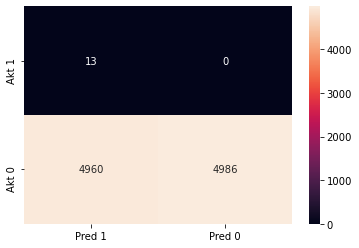

In [34]:
sns.heatmap(df_cm_log, annot=True, fmt='g')

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
modelDT_OS = DecisionTreeClassifier()

In [37]:
#fit model
modelDT_OS.fit(x_train_OverSample, y_train_OverSample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_predDT_OS = modelDT_OS.predict(x_test)

In [124]:
acc_DT = accuracy_score(y_test, y_predDT_OS)
prec_DT = precision_score(y_test, y_predDT_OS)
rec_DT = recall_score(y_test, y_predDT_OS)
f1_DT = f1_score(y_test, y_predDT_OS)
print(classification_report(y_test, y_predDT_OS))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9946
           1       0.53      0.62      0.57        13

    accuracy                           1.00      9959
   macro avg       0.77      0.81      0.79      9959
weighted avg       1.00      1.00      1.00      9959



In [40]:
cm_DT = confusion_matrix(y_test, y_predDT_OS, labels=[1,0])
df_DT = pd.DataFrame(data=cm_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_DT

,Pred 1,Pred 0
Akt 1,8,5
Akt 0,7,9939


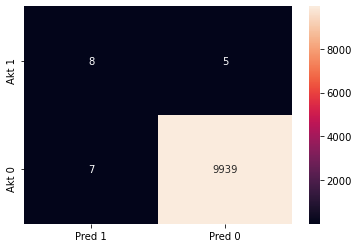

In [41]:
sns.heatmap(df_DT, annot=True, fmt='g')

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
modelRF_OS = RandomForestClassifier()

In [44]:
modelRF_OS.fit(x_train_OverSample, y_train_OverSample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_predRF_OS = modelRF_OS.predict(x_test)

In [46]:
acc_RF_OS = accuracy_score(y_test, y_predRF_OS)
prec_RF_OS = precision_score(y_test, y_predRF_OS)
rec_RF_OS = recall_score(y_test, y_predRF_OS)
f1_RF_OS =f1_score(y_test, y_predRF_OS)

print(classification_report(y_test, y_predRF_OS))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9946
           1       1.00      0.62      0.76        13

    accuracy                           1.00      9959
   macro avg       1.00      0.81      0.88      9959
weighted avg       1.00      1.00      1.00      9959



In [47]:
cm_RF_OS = confusion_matrix(y_test, y_predRF_OS, labels=[1,0])
df_cm_RF_OS = pd.DataFrame(data=cm_RF_OS, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_OS

,Pred 1,Pred 0
Akt 1,8,5
Akt 0,0,9946


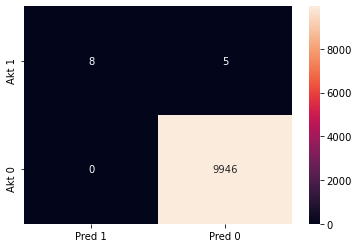

In [48]:
sns.heatmap(df_cm_RF_OS, annot=True, fmt='g')

### Optimize Model

#### Hyper Parameter Tuning

#### 1. Tuning Decision Tree

In [49]:
DT_tuned = DecisionTreeClassifier()

In [109]:
param_DT = {'max_depth':[None, 22, 32],
           'min_samples_split':[2, 23, 38],
           'min_samples_leaf':[1, 4, 12],
           'max_features':[None, .2, .3]}

In [110]:
model_DT = GridSearchCV(estimator=DT_tuned, param_grid=param_DT,
                       cv=3,
                       n_jobs=-1,
                        scoring='recall',
                        verbose=1                        
                       )

In [111]:
model_DT.fit(x_train_OverSample, y_train_OverSample)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    7.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 22, 32],
                         '

In [112]:
DT_tuned = model_DT.best_estimator_
DT_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
y_tunedDT = DT_tuned.predict(x_test)

In [104]:
acc_DT_tuned = accuracy_score(y_test, y_tunedDT)
prec_DT_tuned = precision_score(y_test, y_tunedDT)
rec_DT_tuned = recall_score(y_test, y_tunedDT)
f1_DT_tuned =f1_score(y_test, y_tunedDT)

print(classification_report(y_test, y_tunedDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9946
           1       0.67      0.62      0.64        13

    accuracy                           1.00      9959
   macro avg       0.83      0.81      0.82      9959
weighted avg       1.00      1.00      1.00      9959



In [113]:
cm_DT_tuned = confusion_matrix(y_test, y_tunedDT, labels=[1,0])
df_cm_DT_tuned = pd.DataFrame(data=cm_DT_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT_tuned

,Pred 1,Pred 0
Akt 1,8,5
Akt 0,4,9942


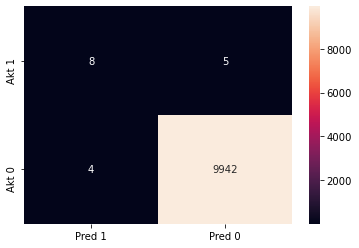

In [114]:
sns.heatmap(df_cm_DT_tuned, annot=True, fmt='g')

### 2. Tuning Random Forest

In [115]:
RF = RandomForestClassifier()

In [116]:
param_RF = {'n_estimators': [100, 200],
           'max_depth':[None, 5,7],
           'min_samples_split':[2,10],
           'min_samples_leaf':[1,5],
           'max_features':[None, .4]}

In [117]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv=3, n_jobs=-1, verbose=1, scoring='recall')

In [118]:
model_RF.fit(x_train_OverSample, y_train_OverSample)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  5.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [119]:
RF_tuned = model_RF.best_estimator_
RF_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_predRF_OS_tuned = RF_tuned.predict(x_test)

In [121]:
acc_RF_OS_tuned = accuracy_score(y_test, y_predRF_OS_tuned)
prec_RF_OS_tuned = precision_score(y_test, y_predRF_OS_tuned)
rec_RF_OS_tuned = recall_score(y_test, y_predRF_OS_tuned)
f1_RF_OS_tuned =f1_score(y_test, y_predRF_OS_tuned)

print(classification_report(y_test, y_predRF_OS_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9946
           1       0.67      0.62      0.64        13

    accuracy                           1.00      9959
   macro avg       0.83      0.81      0.82      9959
weighted avg       1.00      1.00      1.00      9959



In [122]:
cm_RF_OS_tuned = confusion_matrix(y_test, y_predRF_OS_tuned, labels=[1,0])
df_cm_RF_OS_tuned = pd.DataFrame(data=cm_RF_OS_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_OS_tuned

,Pred 1,Pred 0
Akt 1,8,5
Akt 0,4,9942


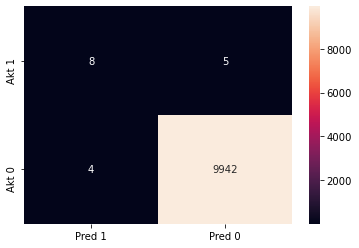

In [123]:
sns.heatmap(df_cm_RF_OS_tuned, annot=True, fmt='g')

### Evaluation Matrix

In [125]:
eva_mat = {
    'Logistic Regression':[acc_LogReg, prec_log, rec_loc, f1_log],
    'Decision Tree':[acc_DT, prec_DT, rec_DT, f1_DT],
    'Decision Tree Tuned':[acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_OS, prec_RF_OS, rec_RF_OS, f1_RF_OS],
    'Random Forest Tuned':[acc_RF_OS_tuned, prec_RF_OS_tuned, rec_RF_OS_tuned, f1_RF_OS_tuned]
}

In [126]:
pd.DataFrame(data=eva_mat, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,Logistic Regression,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned
Accuracy,0.501958,0.998795,0.999096,0.999498,0.999096
Precision,0.002614,0.533333,0.666667,1.000000,0.666667
Recall,1.000000,0.615385,0.615385,0.615385,0.615385
F1 Score,0.005215,0.571429,0.640000,0.761905,0.640000
